# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [2]:
!pip -q install ./python
print('done with requirements install')

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.23 which is incompatible.
done with requirements install


The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [3]:
from unityagents import UnityEnvironment
import numpy as np

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 0.          1.          0.          0.          0.16895212  0.          1.
  0.          0.          0.20073597  1.          0.          0.          0.
  0.12865657  0.          1.          0.          0.          0.14938059
  1.          0.          0.          0.          0.58185619  0.          1.
  0.          0.          0.16089135  0.          1.          0.          0.
  0.31775284  0.          0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [7]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


When finished, you can close the environment.

In [6]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 

In [8]:
# Start by importing the important stuff
import torch
from collections import deque
from dqn_agent import Agent

# Create an agent
agent = Agent(state_size=37, action_size=4, seed=0)

# Use above code with new agent to validate import
env_info = env.reset(train_mode=True)[brain_name]
state = env_info.vector_observations[0]
score = 0
eps = 1.0
while True:
    action = agent.act(state, eps)
    env_info = env.step(action)[brain_name]
    next_state = env_info.vector_observations[0]
    reward = env_info.rewards[0]
    done = env_info.local_done[0]
    score += reward
    state = next_state
    if done:
        break
print("Score: {}".format(score))

Score: 0.0


In [9]:
def dqn(num_ep = 5000, num_tsteps=300, eps_start=1.0, eps_end=.01, eps_decay=0.99):
    ''' Deep Q Learning Fcn:
        Input Params:
            num_ep: max number of episodes (editable)
            num_tsteps: max number of timesteps per episode (from project description on github)
            eps_start: epsilon starting val (seems appropriate)
            eps_end: epsilon ending val (seems appropriate)
            eps_decay: epsilon decay rate (editable)
        Output: Avg score per episode up to num_episodes or done
    '''
    scores = [] # Init scores list
    avg_scores = [] # Init avg scores
    scores_win = deque(maxlen=100) # store last 100 scores for avg (winning is considered >13 score for 100 episodes)
    eps = eps_start # Init eps value for epsilon greedy actions
    for episode in range(1, num_ep+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset environment
        state = env_info.vector_observations[0] # get current env state
        score = 0 # Set score to 0 for start
        for time in range(num_tsteps):
            action = agent.act(state, eps)
            # The next few lines are from code provided above, see Section 3 for comments
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            agent.step(state, action, reward, next_state, done) # Agent learning step (sarsa it up)
            score += reward
            state = next_state
            if done:
                break
        scores_win.append(score) # save current score
        scores.append(score)
        avg_score = np.mean(scores_win)
        avg_scores.append(avg_score)
        eps = max(eps_end, eps_decay * eps) # Epsilon decrease step
        #print("Scores: {}".format(avg_score))
        #print('episode num: {}\tavg score: {:.2f}'.format(episode, avg_score))
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(episode, avg_score), end="")
        if episode % 100 == 0:
            print('\nEpisode num: {}\tAvg score: {:.2f}'.format(episode, np.mean(scores_win)))
        if np.mean(scores_win)>=13.0:
            # Winning is scores above 13 as per github project description, so print that we've won
            print("\nYou did it! Solved in {:d} episodes!\tavg score: {:.2f}".format(episode, np.mean(scores_win)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores, avg_scores

In [10]:
scores, avg_scores = dqn()

Episode 100	Average Score: 2.31
Episode num: 100	Avg score: 2.31
Episode 200	Average Score: 7.79
Episode num: 200	Avg score: 7.79
Episode 300	Average Score: 10.76
Episode num: 300	Avg score: 10.76
Episode 380	Average Score: 13.04
You did it! Solved in 380 episodes!	avg score: 13.04


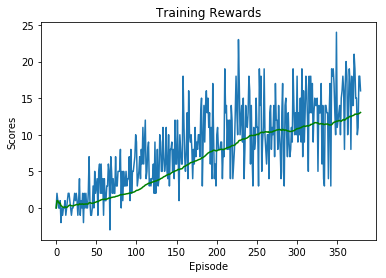

In [11]:
# plot some stuff
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
plt.title('Training Rewards')
episodes = np.arange(len(scores))
plt.plot(episodes, scores, label='DQN Score')
plt.plot(episodes, avg_scores, 'g', label = 'Avg Score')
plt.ylabel('Scores')
plt.xlabel('Episode')
plt.show()

In [15]:
# Testing time

agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth')) #load our training weights
num_episodes = 25
max_step = 300
eps = 0.0
t_scores = []
for episode in range(1, num_episodes+1):
    env_info = env.reset(train_mode=False)[brain_name] # reset environment (this time for testing)
    state = env_info.vector_observations[0] # get current state
    test_score = 0 # init test score to zero 
    for time in range(max_step):
        # A lot of these steps are grabbed from the "random" example above
        action = agent.act(state, eps)
        env_info = env.step(action)[brain_name]
        next_state = env_info.vector_observations[0]
        reward = env_info.rewards[0]
        done = env_info.local_done[0]
        agent.step(state, action, reward, next_state, done) # sarsa time
        test_score += reward
        state = next_state
        if done:
            break
    t_scores.append(test_score) # add current score to test scores
    print('episode num: {}\t score: {:.2f}'.format(episode, test_score))

episode num: 1	 score: 15.00
episode num: 2	 score: 11.00
episode num: 3	 score: 4.00
episode num: 4	 score: 17.00
episode num: 5	 score: 2.00
episode num: 6	 score: 11.00
episode num: 7	 score: 18.00
episode num: 8	 score: 19.00
episode num: 9	 score: 18.00
episode num: 10	 score: 18.00
episode num: 11	 score: 13.00
episode num: 12	 score: 9.00
episode num: 13	 score: 16.00
episode num: 14	 score: 16.00
episode num: 15	 score: 10.00
episode num: 16	 score: 15.00
episode num: 17	 score: 18.00
episode num: 18	 score: 9.00
episode num: 19	 score: 12.00
episode num: 20	 score: 15.00
episode num: 21	 score: 19.00
episode num: 22	 score: 18.00
episode num: 23	 score: 15.00
episode num: 24	 score: 13.00
episode num: 25	 score: 17.00


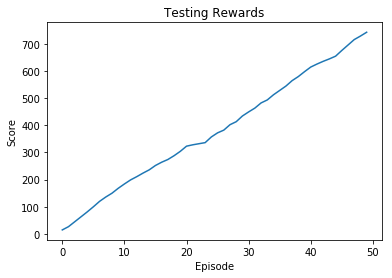

In [14]:
# plot test results
fig = plt.figure()
plt.title('Testing Rewards')
plt.plot(np.arange(len(t_scores)), t_scores)
plt.ylabel('Score')
plt.xlabel('Episode')
plt.show()

In [ ]:
# okay no we're done, close the env
env.close()